In [23]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np


Bentuk data latih (x_train): (60000, 28, 28, 1)
Bentuk data uji (x_test): (10000, 28, 28, 1)

Contoh Visualisasi Data MNIST setelah Pra-Pemrosesan:


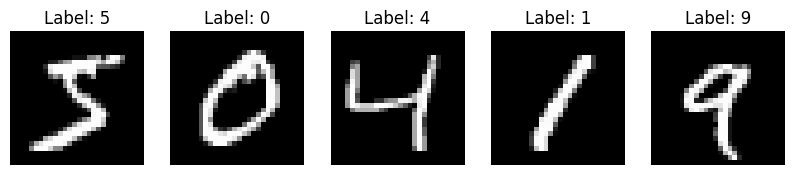

In [24]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 1.2 Normalisasi Piksel [cite: 13]
# Ubah tipe data ke float32 dan normalisasi (skala 0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 1.3 Reshaping Dimensi untuk CNN [cite: 13]
# Model CNN memerlukan input (batch, height, width, channels)
# Data MNIST grayscale, jadi channels = 1
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(f"Bentuk data latih (x_train): {x_train.shape}")
print(f"Bentuk data uji (x_test): {x_test.shape}")

# 1.4 Visualisasi beberapa contoh data MNIST [cite: 14]
print("\nContoh Visualisasi Data MNIST setelah Pra-Pemrosesan:")
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(np.squeeze(x_train[i]), cmap='gray') # np.squeeze untuk hapus dimensi channel
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


In [25]:
print("\nMembangun Model A (CNN dari Nol)...")

model_A = Sequential([
    # Instruksi minimal: Beberapa lapisan Conv2D dan MaxPooling2D [cite: 19]
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Lapisan Flatten [cite: 19]
    Flatten(),

    # Beberapa lapisan Dense [cite: 20]
    Dense(128, activation='relu'),
    # (Opsional tapi direkomendasikan: Dropout untuk mengurangi overfitting)
    Dropout(0.5),

    # Lapisan output dengan aktivasi softmax untuk 10 kelas (0-9) [cite: 20]
    Dense(10, activation='softmax')
])

# Menampilkan ringkasan model (seperti Gambar 1 di PDF)
model_A.summary()


model_A.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', # Cocok untuk label integer (0, 1, 2...)
    metrics=['accuracy']
)

print("\nModel A berhasil dibangun dan di-compile.")


print("\nMemulai pelatihan Model A...")

# Latih model menggunakan data latih MNIST [cite: 21]
# Kita gunakan 20% data latih sebagai data validasi
history_A = model_A.fit(
    x_train,
    y_train,
    epochs=10,
    validation_split=0.2 # Menggunakan 20% data latih untuk validasi
)

print("\nPelatihan Model A selesai.")



Membangun Model A (CNN dari Nol)...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)


Model A berhasil dibangun dan di-compile.

Memulai pelatihan Model A...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8547 - loss: 0.4621 - val_accuracy: 0.9832 - val_loss: 0.0567
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9727 - loss: 0.0887 - val_accuracy: 0.9877 - val_loss: 0.0431
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9811 - loss: 0.0639 - val_accuracy: 0.9870 - val_loss: 0.0423
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9838 - loss: 0.0532 - val_accuracy: 0.9877 - val_loss: 0.0418
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9872 - loss: 0.0433 - val_accuracy: 0.9899 - val_loss: 0.0354
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9886 - loss: 0.0375 - val_accuracy: 0.9906 - val_loss: 0.0353
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9892 - loss: 0.0305 - val_accuracy: 0.9912 - val_loss: 0.0309
Epoch 8/10
1500/1

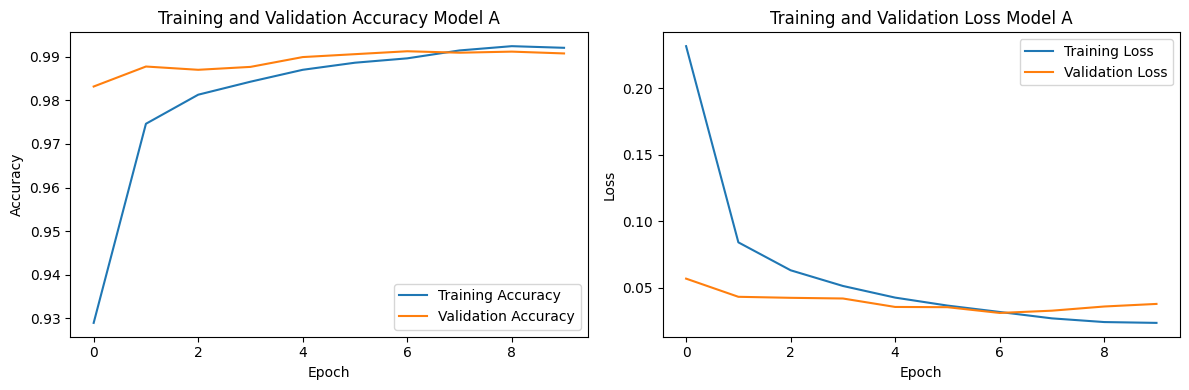

313/313 - 2s - 5ms/step - accuracy: 0.9918 - loss: 0.0284

Akurasi Model A pada Test Set MNIST: 0.9918


In [26]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_A.history['accuracy'], label='Training Accuracy')
plt.plot(history_A.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Model A')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_A.history['loss'], label='Training Loss')
plt.plot(history_A.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Model A')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# (Opsional tapi bagus untuk laporan) Evaluasi akhir di test set MNIST
test_loss, test_acc = model_A.evaluate(x_test, y_test, verbose=2)
print(f'\nAkurasi Model A pada Test Set MNIST: {test_acc:.4f}')



In [27]:
import cv2
import zipfile
import io
import os
import numpy as np
import matplotlib.pyplot as plt



In [28]:
def preprocess_image_from_bytes(image_bytes):
    """
    Memuat, memproses, dan menyiapkan gambar tulisan tangan (dari bytes)
    agar sesuai dengan format input MNIST untuk model.
    """
    # 1. Decode bytes menjadi array numpy
    nparr = np.frombuffer(image_bytes, np.uint8)
    # 2. Baca array numpy sebagai gambar grayscale
    img = cv2.imdecode(nparr, cv2.IMREAD_GRAYSCALE)

    # 3. Inversi warna (dari hitam-di-putih menjadi putih-di-hitam)
    img = cv2.bitwise_not(img)

    # 4. Resize ke 28x28 piksel
    img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)

    # 5. Normalisasi piksel (0-1)
    img = img.astype('float32') / 255.0

    # 6. Reshape agar sesuai input model: (1, 28, 28, 1)
    img_reshaped = np.reshape(img, (1, 28, 28, 1))

    return img_reshaped, img # Kembalikan yg di-reshape (utk prediksi) & yg 2D (utk plot)


In [29]:
from google.colab import files
uploaded = files.upload()


Saving handwritten.zip to handwritten (1).zip


In [30]:
import zipfile
zip_file_path = "handwritten.zip"

try:
    with zipfile.ZipFile(zip_file_path, 'r') as zf:
        print(f"--- Ini adalah isi sebenarnya dari {zip_file_path} ---")
        zf.printdir()
        print("--------------------------------------------------")
except Exception as e:
    print(e)


--- Ini adalah isi sebenarnya dari handwritten.zip ---
File Name                                             Modified             Size
4_1.png                                        2025-11-08 07:59:58         9006
4_2.png                                        2025-11-08 07:59:58         9006
4_3.png                                        2025-11-08 07:59:58         9006
4_4.png                                        2025-11-08 07:59:58         9006
4_5.png                                        2025-11-08 07:59:58         9006
4_6.png                                        2025-11-08 07:59:58         9006
4_7.png                                        2025-11-08 07:59:58         9006
4_8.png                                        2025-11-08 07:59:58         9006
4_9.png                                        2025-11-08 07:59:58         9006
4_10.png                                       2025-11-08 07:59:58         9006
0_1.png                                        2025-11-08 07:59:5

In [31]:
zip_file_path = "handwritten.zip"

nim_digits = [0, 8, 4]
processed_images = [] # Untuk menyimpan gambar yg siap diprediksi
visualization_images = [] # Untuk menyimpan gambar 2D utk di-plot
true_labels = []

print(f"Membaca dan memproses gambar dari: {zip_file_path}")

try:
    with zipfile.ZipFile(zip_file_path, 'r') as zf:
        for digit in nim_digits:
            for i in range(1, 11): # Loop dari 1 sampai 10
                file_name = f"{digit}_{i}.png"

                try:
                    # Baca file gambar langsung dari zip (sebagai bytes)
                    image_bytes = zf.read(file_name)

                    # Proses gambar
                    processed_img, vis_img = preprocess_image_from_bytes(image_bytes)

                    # Simpan hasilnya
                    processed_images.append(processed_img)
                    visualization_images.append(vis_img)
                    true_labels.append(digit)

                except KeyError:
                    # Ini terjadi jika file_name tidak ditemukan di dalam zip
                    print(f"PERINGATAN: File '{file_name}' tidak ditemukan di dalam {zip_file_path}!")

except FileNotFoundError:
    print(f"ERROR: File zip '{zip_file_path}' tidak ditemukan.")
    print("Pastikan nama file zip sudah benar dan berada di folder yang sama dengan notebook ini.")
except zipfile.BadZipFile:
    print(f"ERROR: File '{zip_file_path}' bukan file zip yang valid.")


print(f"\nTotal gambar berhasil diproses: {len(processed_images)}")

Membaca dan memproses gambar dari: handwritten.zip

Total gambar berhasil diproses: 30



Visualisasi contoh gambar setelah pra-pemrosesan:


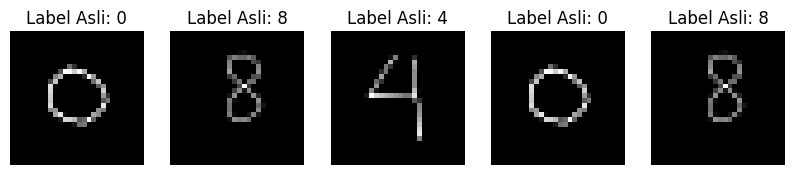

In [32]:
if visualization_images: # Hanya jalankan jika gambar berhasil diproses
    print("\nVisualisasi contoh gambar setelah pra-pemrosesan:")
    plt.figure(figsize=(10, 4))
    # Menampilkan 5 contoh (misalnya gambar pertama, ke-11, dan ke-21)
    indices_to_show = [0, 10, 20, 5, 15]
    for i, index in enumerate(indices_to_show):
        if index < len(visualization_images):
            plt.subplot(1, 5, i+1)
            plt.imshow(visualization_images[index], cmap='gray')
            plt.title(f"Label Asli: {true_labels[index]}")
            plt.axis('off')
    plt.show()

In [33]:
if processed_images: # Hanya jalankan jika gambar berhasil diproses
    # Gabungkan semua gambar yg diproses menjadi satu batch
    image_batch = np.vstack(processed_images) # (30, 28, 28, 1)

    # Lakukan prediksi dengan Model A
    predictions = model_A.predict(image_batch)
    predicted_classes = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


In [34]:
print("\n--- Hasil Prediksi Model A pada Tulisan Tangan Anda ---")

if processed_images: # Hanya jalankan jika gambar berhasil diproses
    correct_predictions = 0
    total_predictions = len(true_labels)

    for i in range(total_predictions):
        true_label = true_labels[i]
        predicted_label = predicted_classes[i]

        status = "Benar" if true_label == predicted_label else "Salah"
        if status == "Benar":
            correct_predictions += 1

        print(f"Citra ke-{i+1} (Angka {true_label}): Prediksi model: {predicted_label} ({status})")

    # Hitung akurasi akhir
    accuracy = (correct_predictions / total_predictions) * 100
    print("\n--- Akurasi Model A (Tulisan Tangan) ---")
    print(f"Total Benar: {correct_predictions} dari {total_predictions}")
    print(f"Akurasi: {accuracy:.2f}%")
else:
    print("\nTidak ada gambar yang diproses. Evaluasi Model A dilewati.")


--- Hasil Prediksi Model A pada Tulisan Tangan Anda ---
Citra ke-1 (Angka 0): Prediksi model: 0 (Benar)
Citra ke-2 (Angka 0): Prediksi model: 0 (Benar)
Citra ke-3 (Angka 0): Prediksi model: 0 (Benar)
Citra ke-4 (Angka 0): Prediksi model: 0 (Benar)
Citra ke-5 (Angka 0): Prediksi model: 0 (Benar)
Citra ke-6 (Angka 0): Prediksi model: 0 (Benar)
Citra ke-7 (Angka 0): Prediksi model: 0 (Benar)
Citra ke-8 (Angka 0): Prediksi model: 0 (Benar)
Citra ke-9 (Angka 0): Prediksi model: 0 (Benar)
Citra ke-10 (Angka 0): Prediksi model: 0 (Benar)
Citra ke-11 (Angka 8): Prediksi model: 0 (Salah)
Citra ke-12 (Angka 8): Prediksi model: 0 (Salah)
Citra ke-13 (Angka 8): Prediksi model: 0 (Salah)
Citra ke-14 (Angka 8): Prediksi model: 0 (Salah)
Citra ke-15 (Angka 8): Prediksi model: 0 (Salah)
Citra ke-16 (Angka 8): Prediksi model: 0 (Salah)
Citra ke-17 (Angka 8): Prediksi model: 0 (Salah)
Citra ke-18 (Angka 8): Prediksi model: 0 (Salah)
Citra ke-19 (Angka 8): Prediksi model: 0 (Salah)
Citra ke-20 (Angka 8)

In [35]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt

In [36]:
INPUT_SIZE_B = 32

# Muat ulang data mentah (jika perlu) atau gunakan x_train, y_train dari atas
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = tf.keras.datasets.mnist.load_data()

# Fungsi pra-pemrosesan untuk VGG16
def preprocess_mnist_for_vgg(images, labels):
    # Ubah ke float32
    images = tf.cast(images, tf.float32)

    # 1. Ubah Grayscale (1 ch) ke RGB (3 ch)
    images_rgb = tf.image.grayscale_to_rgb(tf.expand_dims(images, -1))

    # 2. Resize dari 28x28 ke 32x32
    images_resized = tf.image.resize(images_rgb, [INPUT_SIZE_B, INPUT_SIZE_B])

    # 3. Gunakan normalisasi bawaan VGG16 (ini PENTING)
    images_preprocessed = vgg16_preprocess_input(images_resized)

    return images_preprocessed, labels

print("Memproses data MNIST untuk VGG16...")

# [Refaktor] Menggunakan tf.data.Dataset agar lebih efisien
# Gunakan y_train_raw (label 0-9), bukan y_train (yang mungkin sudah di-one-hot)
train_ds_B = tf.data.Dataset.from_tensor_slices((x_train_raw, y_train_raw))
train_ds_B = train_ds_B.shuffle(1024).batch(128)
train_ds_B = train_ds_B.map(preprocess_mnist_for_vgg, num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

test_ds_B = tf.data.Dataset.from_tensor_slices((x_test_raw, y_test_raw))
test_ds_B = test_ds_B.batch(128)
test_ds_B = test_ds_B.map(preprocess_mnist_for_vgg, num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

print("Data siap untuk Model B.")

Memproses data MNIST untuk VGG16...
Data siap untuk Model B.


In [37]:
base_model_B = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(INPUT_SIZE_B, INPUT_SIZE_B, 3)
)

base_model_B.trainable = False

x = base_model_B.output
x = GlobalAveragePooling2D()(x) # Mengubah output VGG16 menjadi 1D vektor
x = Dense(128, activation='relu')(x) # Layer Dense tambahan
x = Dropout(0.5)(x) # Dropout seperti di Model A
output_layer = Dense(10, activation='softmax')(x) # Output 10 kelas

# Gabungkan menjadi Model B
model_B = Model(inputs=base_model_B.input, outputs=output_layer)

# Compile model
model_B.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', # Gunakan sparse karena label y (0-9)
    metrics=['accuracy']
)

print("\nRingkasan Model B (VGG16):")
model_B.summary()


Ringkasan Model B (VGG16):


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,781,642 (56.39 MB)

 Trainable params: 66,954 (261.54 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [38]:
print("\nMemulai pelatihan Model B...")
history_B = model_B.fit(
    train_ds_B,
    epochs=5,
    validation_data=test_ds_B
)
print("\nPelatihan Model B selesai.")


Memulai pelatihan Model B...
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step - accuracy: 0.5734 - loss: 3.9094 - val_accuracy: 0.8981 - val_loss: 0.3207
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.8403 - loss: 0.4938 - val_accuracy: 0.9236 - val_loss: 0.2409
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.8758 - loss: 0.3921 - val_accuracy: 0.9285 - val_loss: 0.2183
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.8921 - loss: 0.3393 - val_accuracy: 0.9335 - val_loss: 0.1941
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9013 - loss: 0.3108 - val_accuracy: 0.9384 - val_loss: 0.1861

Pelatihan Model B selesai.



Menampilkan plot training history Model B...


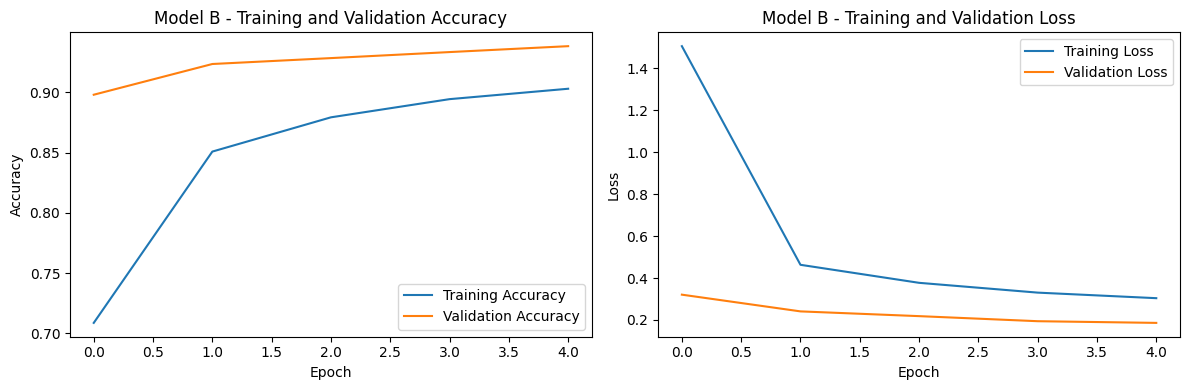

In [39]:
print("\nMenampilkan plot training history Model B...")
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_B.history['accuracy'], label='Training Accuracy')
plt.plot(history_B.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model B - Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_B.history['loss'], label='Training Loss')
plt.plot(history_B.history['val_loss'], label='Validation Loss')
plt.title('Model B - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [40]:
import cv2
import zipfile
import io

In [41]:
def preprocess_nim_image_for_vgg(image_bytes):
    """
    Memuat gambar NIM dari bytes, memprosesnya untuk VGG16.
    """
    nparr = np.frombuffer(image_bytes, np.uint8)
    # 1. Baca sebagai grayscale
    img_gray = cv2.imdecode(nparr, cv2.IMREAD_GRAYSCALE)

    if img_gray is None:
        return None

    # 2. Inversi warna (Wajib sama seperti Model A)
    img_inverted = cv2.bitwise_not(img_gray)

    # 3. Ubah ke RGB (3 Channel) agar sesuai input VGG16
    img_rgb = cv2.cvtColor(img_inverted, cv2.COLOR_GRAY2RGB)

    # 4. Resize ke 32x32 (sesuai input Model B)
    img_resized = cv2.resize(img_rgb, (INPUT_SIZE_B, INPUT_SIZE_B), interpolation=cv2.INTER_AREA)

    # 5. Normalisasi VGG16 (Wajib sama seperti saat melatih Model B)
    img_preprocessed = vgg16_preprocess_input(img_resized)

    return img_preprocessed

In [42]:
nim_digits = [0, 8, 4] # NIM Anda
zip_file_path = "handwritten.zip"

correct_B = 0
total_B = 0

print("\n--- Hasil Prediksi Model B (Transfer Learning) ---")

try:
    with zipfile.ZipFile(zip_file_path, 'r') as zf:
        for digit in nim_digits:
            for i in range(1, 11):
                file_name = f"{digit}_{i}.png"
                try:
                    image_bytes = zf.read(file_name)
                    processed_img = preprocess_nim_image_for_vgg(image_bytes)

                    if processed_img is not None:
                        img_batch = np.expand_dims(processed_img, axis=0)

                        # Prediksi
                        prediction = model_B.predict(img_batch, verbose=0)
                        predicted_label = np.argmax(prediction)

                        true_label = digit
                        status = "Benar" if predicted_label == true_label else "Salah"

                        if status == "Benar":
                            correct_B += 1
                        total_B += 1

                        print(f"Gambar: {file_name} (Asli: {true_label}) -> Prediksi: {predicted_label} ({status})")

                except KeyError:
                    pass

except FileNotFoundError:
    print(f"ERROR: File zip '{zip_file_path}' tidak ditemukan.")



--- Hasil Prediksi Model B (Transfer Learning) ---
Gambar: 0_1.png (Asli: 0) -> Prediksi: 9 (Salah)
Gambar: 0_2.png (Asli: 0) -> Prediksi: 9 (Salah)
Gambar: 0_3.png (Asli: 0) -> Prediksi: 9 (Salah)
Gambar: 0_4.png (Asli: 0) -> Prediksi: 9 (Salah)
Gambar: 0_5.png (Asli: 0) -> Prediksi: 9 (Salah)
Gambar: 0_6.png (Asli: 0) -> Prediksi: 9 (Salah)
Gambar: 0_7.png (Asli: 0) -> Prediksi: 9 (Salah)
Gambar: 0_8.png (Asli: 0) -> Prediksi: 9 (Salah)
Gambar: 0_9.png (Asli: 0) -> Prediksi: 9 (Salah)
Gambar: 0_10.png (Asli: 0) -> Prediksi: 9 (Salah)
Gambar: 8_1.png (Asli: 8) -> Prediksi: 3 (Salah)
Gambar: 8_2.png (Asli: 8) -> Prediksi: 3 (Salah)
Gambar: 8_3.png (Asli: 8) -> Prediksi: 3 (Salah)
Gambar: 8_4.png (Asli: 8) -> Prediksi: 3 (Salah)
Gambar: 8_5.png (Asli: 8) -> Prediksi: 3 (Salah)
Gambar: 8_6.png (Asli: 8) -> Prediksi: 3 (Salah)
Gambar: 8_7.png (Asli: 8) -> Prediksi: 3 (Salah)
Gambar: 8_8.png (Asli: 8) -> Prediksi: 3 (Salah)
Gambar: 8_9.png (Asli: 8) -> Prediksi: 3 (Salah)
Gambar: 8_10.png

In [43]:
if total_B > 0:
    accuracy_B_percent = (correct_B / total_B) * 100
    print("\n--- Akurasi Model B (Tulisan Tangan) ---")
    print(f"Total Benar: {correct_B} dari {total_B}")
    print(f"Akurasi: {accuracy_B_percent:.2f}%")
else:
    print("Tidak ada gambar NIM yang dievaluasi.")


--- Akurasi Model B (Tulisan Tangan) ---
Total Benar: 10 dari 30
Akurasi: 33.33%
